# Simple Moving Average Indicator in Stock Predictions

Reference:
* [Computer Science](https://www.youtube.com/watch?v=PUk5E8G1r44&ab_channel=ComputerScience)
* Datasets: [Yahoo Finance](https://finance.yahoo.com/)

## Import modules and datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For chart style
plt.style.use('seaborn-whitegrid')

In [2]:
# Store the data
df = pd.read_csv("PGAS.JK (1).csv")

# Set the date columns as the index
df = df.set_index('Date')

# Set the index into datetime for efficency
df = df.set_index(pd.DatetimeIndex(df.index.values))

In [3]:
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume
2016-08-04,3300.0,3330.0,3240.0,3300.0,2778.076416,38220800.0
2016-08-05,3300.0,3370.0,3280.0,3350.0,2820.168457,35901300.0
2016-08-08,3360.0,3370.0,3250.0,3270.0,2752.821289,44279000.0
2016-08-09,3280.0,3310.0,3180.0,3230.0,2719.147705,43741400.0
2016-08-10,3240.0,3260.0,3180.0,3180.0,2677.055420,23591800.0
...,...,...,...,...,...,...
2021-07-28,1030.0,1035.0,1000.0,1005.0,1005.000000,97526100.0
2021-07-29,1015.0,1015.0,990.0,1005.0,1005.000000,108477500.0
2021-07-30,1010.0,1010.0,970.0,975.0,975.000000,240537200.0
2021-08-02,980.0,990.0,960.0,990.0,990.000000,86357700.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2016-08-04 to 2021-08-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   float64
dtypes: float64(6)
memory usage: 69.0 KB


## Visualize the Adj Close Price

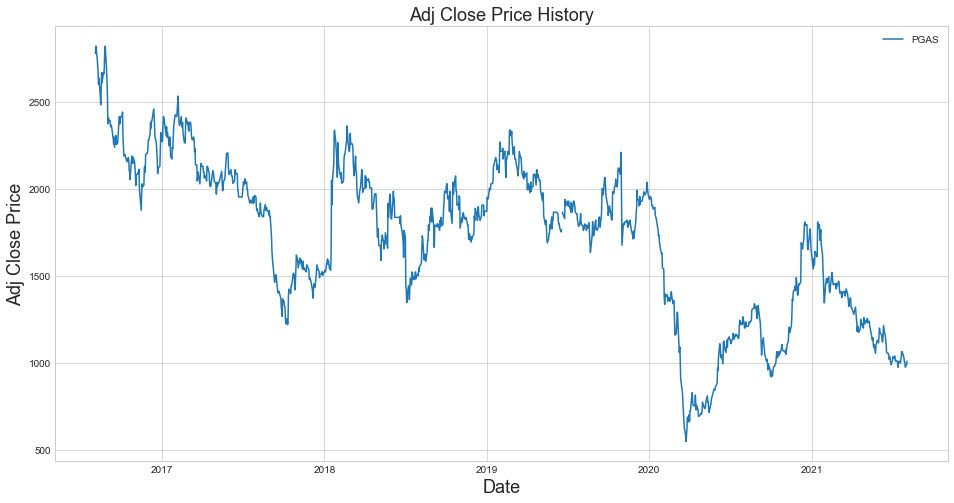

In [5]:
# Visualize the adj close price
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='PGAS')

# Adding text into the visualization
plt.title('Adj Close Price History', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

## Build SMA Function

In [6]:
# Create function for calculating Simple Moving Average (SMA)
def SMA(data, period=30, column='Adj Close'):
    return data[column].rolling(window=period).mean()

In [7]:
# Create two new columns to store the 10 day and 50 day SMA
df['SMA10'] = SMA(df, 10)
df['SMA50'] = SMA(df, 50)

In [8]:
# Get buy and sell signals
df['Signal'] = np.where(df['SMA10'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['Adj Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Adj Close'], np.NAN)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA50,Signal,Position,Buy,Sell
2016-08-04,3300.0,3330.0,3240.0,3300.0,2778.076416,38220800.0,NaN,NaN,0,NaN,NaN,NaN
2016-08-05,3300.0,3370.0,3280.0,3350.0,2820.168457,35901300.0,NaN,NaN,0,0.0,NaN,NaN
2016-08-08,3360.0,3370.0,3250.0,3270.0,2752.821289,44279000.0,NaN,NaN,0,0.0,NaN,NaN
2016-08-09,3280.0,3310.0,3180.0,3230.0,2719.147705,43741400.0,NaN,NaN,0,0.0,NaN,NaN
2016-08-10,3240.0,3260.0,3180.0,3180.0,2677.055420,23591800.0,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28,1030.0,1035.0,1000.0,1005.0,1005.000000,97526100.0,1022.5,1072.9,0,0.0,NaN,NaN
2021-07-29,1015.0,1015.0,990.0,1005.0,1005.000000,108477500.0,1025.5,1070.4,0,0.0,NaN,NaN
2021-07-30,1010.0,1010.0,970.0,975.0,975.000000,240537200.0,1023.0,1067.0,0,0.0,NaN,NaN
2021-08-02,980.0,990.0,960.0,990.0,990.000000,86357700.0,1021.0,1064.6,0,0.0,NaN,NaN


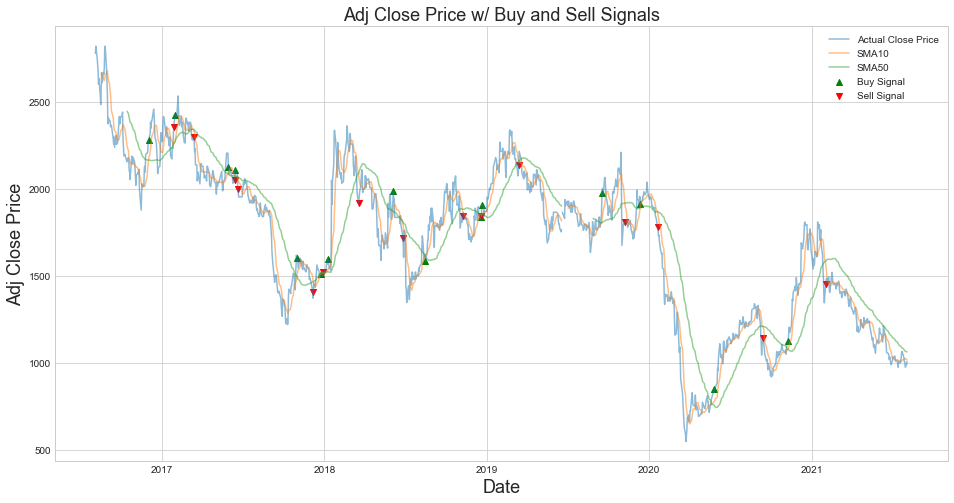

In [10]:
# Visualize the close price with SMA also Buy and Sell Signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], alpha=0.5, label='Actual Close Price')
plt.plot(df['SMA10'], alpha=0.5, label='SMA10')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')

# Make buy or sell signal
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')

# Adding text into the visualization
plt.title('Adj Close Price w/ Buy and Sell Signals', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

## Understanding the SMA

In [11]:
df.SMA10[:15]

2016-08-04            NaN
2016-08-05            NaN
2016-08-08            NaN
2016-08-09            NaN
2016-08-10            NaN
2016-08-11            NaN
2016-08-12            NaN
2016-08-15            NaN
2016-08-16            NaN
2016-08-18    2666.953394
2016-08-19    2650.116577
2016-08-22    2634.963428
2016-08-23    2625.703174
2016-08-24    2623.177612
2016-08-25    2635.805225
Name: SMA10, dtype: float64

SMA10 is starting at the 10 index

In [12]:
df.SMA50[:50]

2016-08-04            NaN
2016-08-05            NaN
2016-08-08            NaN
2016-08-09            NaN
2016-08-10            NaN
2016-08-11            NaN
2016-08-12            NaN
2016-08-15            NaN
2016-08-16            NaN
2016-08-18            NaN
2016-08-19            NaN
2016-08-22            NaN
2016-08-23            NaN
2016-08-24            NaN
2016-08-25            NaN
2016-08-26            NaN
2016-08-29            NaN
2016-08-30            NaN
2016-08-31            NaN
2016-09-01            NaN
2016-09-02            NaN
2016-09-05            NaN
2016-09-06            NaN
2016-09-07            NaN
2016-09-08            NaN
2016-09-09            NaN
2016-09-13            NaN
2016-09-14            NaN
2016-09-15            NaN
2016-09-16            NaN
2016-09-19            NaN
2016-09-20            NaN
2016-09-21            NaN
2016-09-22            NaN
2016-09-23            NaN
2016-09-26            NaN
2016-09-27            NaN
2016-09-28            NaN
2016-09-29  

SMA10 is starting at the 50 index

## Thanks

Have A Nice Code!